In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
file = open("noisy.txt", "r")
data = file.read().split()
data = [float(i) for i in data]
n = len(data)

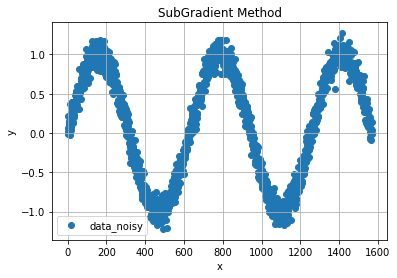

In [15]:
fig, ax = plt.subplots()
ax.scatter(range(0,n), data[:], label='data_noisy')
ax.set_title('SubGradient Method')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.grid()
leg = ax.legend()
# plt.savefig('Newton Raphson for digits dataset ',dpi=300, bbox_inches='tight')
plt.show()

In [4]:
####D matrix#####
D = np.zeros((n-1,n))
for i in range(n-1):
    D[i,i] = 1
    D[i,i+1] = -1
print(D)

[[ 1. -1.  0. ...  0.  0.  0.]
 [ 0.  1. -1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -1.  0.  0.]
 [ 0.  0.  0. ...  1. -1.  0.]
 [ 0.  0.  0. ...  0.  1. -1.]]


In [245]:
#########Sub gradient Method##########
DT = D.transpose()
D = np.array(D)
DT  = np.array(DT)
iters = 100
lamb = 0.5
xprev = np.zeros(n)
x = np.zeros(n)
alpha = 0.3

def gamma(n):
    x = []
    for i in n:
        if i>0:
            x.append(1)
        elif i<0:
            x.append(-1)
        if i==0:
            x.append(np.random.uniform(-1,1))
    return x
        
cost = []
for k in range(0,iters):
    
    
    g = x-data+lamb*np.matmul(DT,gamma(np.matmul(D,x)))
    x = x - alpha*g
    cost.append(min(1/2*(x-data)**2+lamb*sum(abs(np.matmul(D,x)))))
    




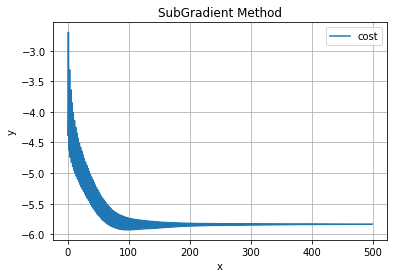

In [264]:
fig, ax = plt.subplots()
ax.plot(range(0,iters),cost[:], label='cost')
# ax.scatter(range(0,n),x[:], label='data_denoised')
ax.set_title('SubGradient Method')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.grid()
leg = ax.legend()
# plt.savefig('Newton Raphson for digits dataset ',dpi=300, bbox_inches='tight')
plt.show()

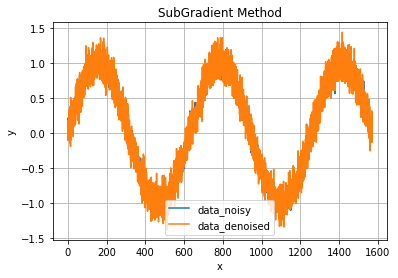

In [247]:
fig, ax = plt.subplots()
ax.plot(range(0,n),data[:], label='data_noisy')
ax.plot(range(0,n),x[:], label='data_denoised')
ax.set_title('SubGradient Method')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.grid()
leg = ax.legend()
# plt.savefig('Newton Raphson for digits dataset ',dpi=300, bbox_inches='tight')
plt.show()

In [260]:
#################proximal gradient descent#########
iters = 500
lamb = 0.2
xprev = np.zeros(n-1)
x = np.zeros(n-1)
alpha = 0.5
# print(n)

D = np.array(D)
DT  = np.array(DT)
DDT = np.matmul(D,DT)
DZ = np.matmul(D,np.array(data))

def prox(u, lamb):
    x = []
    for i in u:
        if i>lamb:
            x.append(lamb)
        elif i<-lamb:
            x.append(-lamb)
        else:
            x.append(i)
    return x
    
cost =[]
for k in range(0,iters):
    
    #x = prox(xprev-alpha*np.matmul(np.matmul(D,DT),xprev)-np.matmul(D,np.array(data)),lamb)
    x = x-(alpha*np.matmul(DDT,x)-DZ*lamb)
    x[x > lamb] = lamb
    x[x< -lamb] = -lamb
    cost.append(0.5*np.matmul(np.matmul(x.T, D), np.matmul(D.T, x)) - np.matmul(np.matmul(x.T, D), data))
#     break

###reconstruction
denoised = []
temp = 0
# for i in range(0,n):
#     temp = data[i]+temp
#     denoised.append(temp)
    
    
    
X3 = data - np.matmul(DT,x)

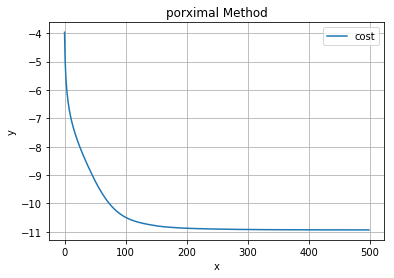

In [254]:
fig, ax = plt.subplots()

ax.plot(cost, label='cost')
# ax.plot(range(0,n),X[:], label='data_denoised')
ax.set_title('porximal Method')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.grid()
leg = ax.legend()
plt.savefig('proximalCost ',dpi=300, bbox_inches='tight')
plt.show()

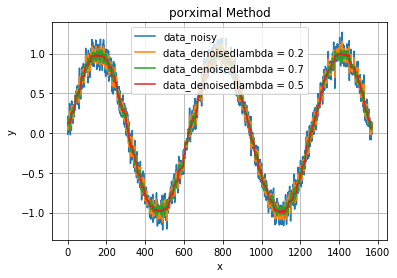

In [263]:
fig, ax = plt.subplots()

ax.plot(range(0,n),data[:], label='data_noisy')
ax.plot(range(0,n),X3[:], label='data_denoised'+str('lambda = 0.2'))
ax.plot(range(0,n),X2[:], label='data_denoised'+str('lambda = 0.7'))
ax.plot(range(0,n),X1[:], label='data_denoised'+str('lambda = 0.5'))

ax.set_title('porximal Method')
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.grid()
leg = ax.legend()
plt.savefig('proximal ',dpi=300, bbox_inches='tight')
plt.show()